# References
* [Dask website](https://dask.pydata.org/)
* [Dask Tutorial](https://github.com/dask/dask-tutorial)
* [Matrix multiplication by Pantelis Isaiah](https://pantelisaiah.wordpress.com/portfolio/matrix-multiplication/)

# Matrix Multiplication
* create a sequence of matrices of increasing size with the entries of the matrices being random numbers.
* multiplies them.
* times the multiplications.

The **dask** python library allows the user to break the arrays into chunks. 

- The syntax is reminiscent of the numpy syntax.  If you
```python
import dask.array as da
```
then you just have to substitute
```txt
np.<method> for da.<method>
```

### NumPy version

In [10]:
import numpy as np
import time
 
array_sizes = [5] + list(range(10, 2001, 10))
 
times_elapsed_np = np.full((len(array_sizes), 1), 0.0)
 
num_loops = 10
the_loop = np.array(range(1, num_loops + 1))
chunk_size = 500
 
k = 0
for array_size in array_sizes:
    A = np.random.random((array_size, array_size))
    B = np.random.random((array_size, array_size))
    C = np.full((array_size, array_size), 0.0)
 
    start = time.process_time()
 
    for loop_counter in the_loop:
        C = A.dot(B)
 
    times_elapsed_np[k] = (time.process_time() - start)/num_loops*1000 # in msec
    k += 1

In [11]:
import dask
import dask.array as da
 
array_sizes = [5] + list(range(10, 2001, 10))
 
times_elapsed_da = np.full((len(array_sizes), 1), 0.0)
 
num_loops = 10
the_loop = np.array(range(1, num_loops + 1))
chunk_size = 500
 
k = 0
for array_size in array_sizes:
    A = da.random.random((array_size, array_size), chunks = chunk_size)
    B = da.random.random((array_size, array_size), chunks = chunk_size)
    C = da.full((array_size, array_size), 0.0, chunks = chunk_size)
 
    start = time.process_time()
 
    for loop_counter in the_loop:
 
        C = A.dot(B)
 
    times_elapsed_da[k] = (time.process_time() - start)/num_loops*1000 # in msec
    k += 1

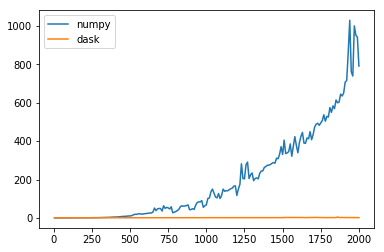

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(array_sizes, times_elapsed_np, label='numpy')
plt.plot(array_sizes, times_elapsed_da, label='dask')
plt.legend()